In [41]:
pip install -U scikit-fuzzy

# Sistem Kontrol Frekuensi Putar Kipas Angin





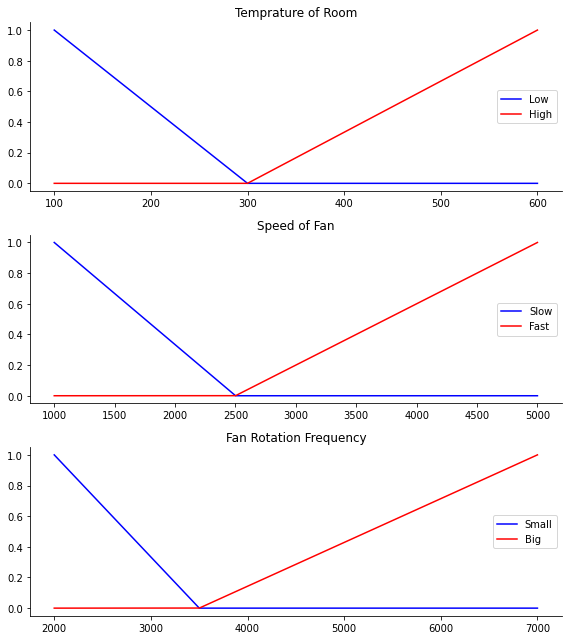

In [40]:
# Maulana Bintang Irfansyah - TI 2H
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
temp = np.arange(100, 601, 1)
speed = np.arange(1000, 5001, 1)
freq = np.arange(2000, 7001, 1)

temp_lo = fuzz.trimf(temp, [100, 100, 300])
temp_hi = fuzz.trimf(temp, [300, 600, 600])
speed_slow = fuzz.trimf(speed, [1000, 1000, 2500])
speed_fast = fuzz.trimf(speed, [2500, 5000, 5000])
freq_small = fuzz.trimf(freq, [2000, 2000, 3500])
freq_big = fuzz.trimf(freq, [3500, 7000, 7000])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(temp, temp_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(temp, temp_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Temprature of Room')
ax0.legend()

ax1.plot(speed, speed_slow, 'b', linewidth=1.5, label='Slow')
ax1.plot(speed, speed_fast, 'r', linewidth=1.5, label='Fast')
ax1.set_title('Speed of Fan')
ax1.legend()

ax2.plot(freq, freq_small, 'b', linewidth=1.5, label='Small')
ax2.plot(freq, freq_big, 'r', linewidth=1.5, label='Big')
ax2.set_title('Fan Rotation Frequency')
ax2.legend()


# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
pip install -U scikit-fuzzy

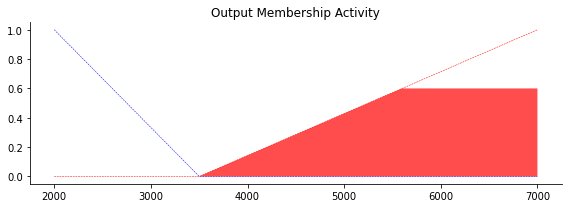

In [37]:
# Maulana Bintang Irfansyah - TI 2H
temp_level_lo = fuzz.interp_membership(temp, temp_lo, 300)
temp_level_hi = fuzz.interp_membership(temp, temp_hi, 300)

speed_level_slow = fuzz.interp_membership(speed, speed_slow, 4000)
speed_level_fast = fuzz.interp_membership(speed, speed_fast, 4000)

active_rule1 = np.fmax(speed_level_slow, temp_level_hi)
freq_activation_small_1 = np.fmin(active_rule1, freq_small)

active_rule2 = np.fmax(speed_level_slow, temp_level_lo)
freq_activation_small_2 = np.fmin(active_rule2, freq_small)

active_rule3 = np.fmax(speed_level_fast, temp_level_hi)
freq_activation_big_1 = np.fmin(active_rule3, freq_big)

active_rule4 = np.fmax(speed_level_fast, temp_level_lo)
freq_activation_big_2 = np.fmin(active_rule4, freq_big)

freq0= np.zeros_like(freq)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(freq, freq0, freq_activation_small, facecolor='b', alpha=0.7)
ax0.plot(freq, freq_small, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(freq, freq0, freq_activation_big, facecolor='r', alpha=0.7)
ax0.plot(freq, freq_big, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output Membership Activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

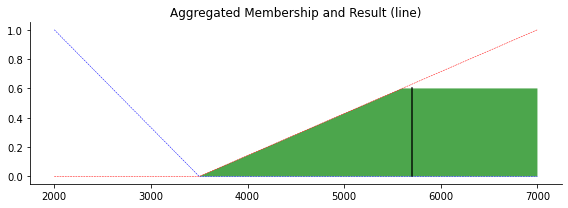

In [49]:
# Maulana Bintang Irfansyah - TI 2H
aggregated = np.fmax(freq_activation_small_1, np.fmax(freq_activation_big_1, freq_activation_small_2, freq_activation_big_2))

frq = fuzz.defuzz(freq, aggregated, 'centroid')
frq_activation = fuzz.interp_membership(freq, aggregated, frq)
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(freq, freq_small, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(freq, freq_big, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(freq, freq0, aggregated, facecolor='Green', alpha=0.7)
ax0.plot([frq, frq], [0, frq_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated Membership and Result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_qual = np.arange(0, 101, 1)
x_serv = np.arange(0, 101, 1)
x_tip  = np.arange(0, 101, 1)

temp_lo    = fuzz.trimf(x_qual, [0, 0, 50])
temp_md    = fuzz.trimf(x_qual, [0, 50, 100])
temp_hi    = fuzz.trimf(x_qual, [50, 100, 100])
hum_lo     = fuzz.trimf(x_serv, [0, 0, 50])
hum_md     = fuzz.trimf(x_serv, [0, 50, 100])
hum_hi     = fuzz.trimf(x_serv, [50, 100, 100])
speed_lo   = fuzz.trimf(x_tip, [0, 0, 25])
speed_md   = fuzz.trimf(x_tip, [0, 25, 50])
speed_hi   = fuzz.trimf(x_tip, [25, 50, 75])
speed_hig  = fuzz.trimf(x_tip, [50, 75, 100])
speed_high = fuzz.trimf(x_tip, [75, 100, 100])
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, temp_lo, 'b', linewidth=1.5, label='low')
ax0.plot(x_qual, temp_md, 'g', linewidth=1.5, label='medium')
ax0.plot(x_qual, temp_hi, 'r', linewidth=1.5, label='high')
ax0.set_title('Temperature')
ax0.legend()

ax1.plot(x_serv, hum_lo, 'b', linewidth=1.5, label='low')
ax1.plot(x_serv, hum_md, 'g', linewidth=1.5, label='medium')
ax1.plot(x_serv, hum_hi, 'r', linewidth=1.5, label='high')
ax1.set_title('Humidity')
ax1.legend()

ax2.plot(x_tip, speed_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, speed_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, speed_hi, 'r', linewidth=1.5, label='High')
ax2.plot(x_tip, speed_hig, 'm', linewidth=1.5, label='more high')
ax2.plot(x_tip, speed_high, 'c', linewidth=1.5, label='highest')
ax2.set_title('Fan Speed')
ax2.legend()
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
tem=input("enter temp:")
hum=input("enter humidity:")
levt_lo = fuzz.interp_membership(x_qual, temp_lo, tem)
levt_md = fuzz.interp_membership(x_qual, temp_md, tem)
levt_hi = fuzz.interp_membership(x_qual, temp_hi, tem)

levh_lo = fuzz.interp_membership(x_serv, hum_lo, hum)
levh_md = fuzz.interp_membership(x_serv, hum_md, hum)
levh_hi = fuzz.interp_membership(x_serv, hum_hi, hum)

active_rule1 = np.fmax(levt_lo, levh_lo)
active_rule2 = np.fmax(levt_lo, levh_md)
active_rule3 = np.fmax(levt_lo, levh_hi)
active_rule4 = np.fmax(levt_md, levh_lo)
active_rule5 = np.fmax(levt_md, levh_md)
active_rule6 = np.fmax(levt_md, levh_hi)
active_rule7 = np.fmax(levt_hi, levh_lo)
active_rule8 = np.fmax(levt_hi, levh_md)
active_rule9 = np.fmax(levt_hi, levh_hi)

factive_rule1=np.fmin(active_rule1, speed_lo)
factive_rule2=np.fmin(active_rule2, speed_md)
factive_rule3=np.fmin(active_rule3, speed_md)
factive_rule4=np.fmin(active_rule4, speed_hi)
factive_rule5=np.fmin(active_rule5, speed_hi)
factive_rule6=np.fmin(active_rule6, speed_hig)
factive_rule7=np.fmin(active_rule7, speed_hig)
factive_rule8=np.fmin(active_rule8, speed_high)
factive_rule9=np.fmin(active_rule9, speed_high)

aggregated = np.fmax(factive_rule1,
                     np.fmax(factive_rule2,
                             np.fmax(factive_rule3,
                                     np.fmax(factive_rule4,
                                             np.fmax(factive_rule5,
                                                     np.fmax(factive_rule6,
                                                             np.fmax(factive_rule7,
                                                                     np.fmax(factive_rule8,factive_rule9))))))))

output_specifier=['low speed','medium speed','medium speed','high speed','high speed','more high speed','more high speed','highest speed','highest speed']
possible_aggregate=[active_rule1,active_rule2,active_rule3,active_rule4,active_rule5,active_rule6,active_rule7,active_rule8,active_rule9]
print(possible_aggregate)
aggregate = np.argwhere(possible_aggregate == np.amax(possible_aggregate))
aggregate = aggregate.flatten().tolist()
print("Possible values:-")
for i in range(len(aggregate)):
    print(output_specifier[aggregate[i]])

final_speed = fuzz.defuzz(x_tip, aggregated, 'centroid')
print("resultant fan speed : ",final_speed)